# Método de Monte Carlo
Método para encontrar o valor da integral de uma função, em um determinado intervalo $x \in [a,b]$, partindo do teorema do valor médio: $\newline$

f(x) $\approx$ $\frac{f(a) + f(b)}{2}$, com  $x \in [a,b]$.  $\newline$
f(x) $\approx$ $\frac{\sum_i^n f(x_i)}{n}$, $x \in [x_{min}, x_{max}]$ $\newline$

* Assim, o valor da integral é dado por: $\newline$

$ \int_a^b f(x) dx $ = $<f> (b - a)$ $\newline$

* O valor médio da função será calculado via números aleatórios, onde partimos do presuposto que para uma quantidade grande de números de testes o valor médio obtido convergirá para o valor médio da função. $\newline$

* Exemplo: calcule a integral da função f(x) = $sin^2(x) \cdot cos^2(x)$ com [-10,10].

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm.auto import tqdm

In [2]:
def func(x):
    return ((np.sin(x))**2)*((np.cos(x))**2)

In [3]:
def MonteCarlo(func, a, b, n = 10**6):
    '''
    Cálcula a integral de uma função via método de monte carlo
    INPUT:
        func: função a ser integrada
        a: ponto inicial
        b: ponto final
    
    OUTPUT:
        Valor da integral da função no intervalo imposto.
    
    '''
    media = 0
    for i in range(1,n):
        media = media + func(random.uniform(a,b))
    
    integral = (b - a)*media*(1/n)
    return integral

In [4]:
MonteCarlo(func, -10, 10)

2.452262285115532

# Método de Monte Carlo Variacional

* Diferenças finitas: segunda derivada
f''(x) = $\frac{f(x + h) + f(x - h) - 2f(x)}{h^2}$ = $\frac{\Psi_{i+1} + \Psi_{i-1} - 2 \Psi_i}{h^2}$ $\newline$

* Energia:

E = $\frac{< \Psi + \delta \Psi \mid - 1/2 (\partial^2/\partial x^2) + V(x) \mid \Psi + \delta \Psi>}{<\Psi + \delta \Psi \mid \Psi + \delta \Psi >} $ = $\frac{1}{<\Psi + \delta \Psi \mid \Psi + \delta \Psi >} (<\Psi + \delta \Psi \mid - 1/2 (\partial^2/\partial x^2) \mid \Psi + \delta \Psi> + <\Psi + \delta \Psi \mid V(x) \mid \Psi + \delta \Psi>)$

In [2]:
#norrmalização da função
def normalization(psi):
    return (1/(np.sqrt(np.vdot(psi, psi))))*psi

In [3]:
def segundaDerivada(psi, x):
    dx = (-0.5)/((x[-1] - x[0])/N)**2
    #O termo f[:-2] pega todos os termos até n-3
    #O termo f[1:-2] pega todos os termos de n = 1 até n-2
    #O termo f[2:] pega todos os elementos de n = 2 até n-1
    
    first = 0 - 2*psi[0] + psi[1]
    last = psi[-2] - 2*psi[-1] + 0
    h = psi[:-2] - 2*psi[1:-1] + psi[2:]
    
    hamilton1 = np.append([first], h)
    hamilton = np.append(hamilton1, [last])
    
    return np.array(hamilton)*dx
    

In [19]:
#energia
def energia(psi, potencial, y, x, N):
    dx = (-0.5)/((x[-1] - x[0])/N)**2
    Hamilton = dx*(-2*np.eye(len(y)) + np.eye(len(y),k=1) + np.eye(len(y), k= -1))
    return (np.vdot(psi, Hamilton@psi) + np.vdot(psi, potencial*psi))/(np.vdot(psi,psi))

In [20]:
#amostragem por importância

def importance(f):
    p = np.abs(f**2)/np.max(f**2)
    while True:
        n = np.random.randint(0,len(f))
        q = np.random.rand()
        if q < p[n]:
            return n

In [21]:
def montecarlo(psi, potencial, x, y, N, contador = 10000, delta = 10**(-3)):
    for i in range(contador):
        PsiN = normalization(psi) #normalização da função de entrada
        j = np.random.randint(0, N) #número inteiro aleatório entre 0 e 100
        vPsiN = np.random.uniform(-delta,delta) #variação da função de onda
        
        E = energia(PsiN, potencial, y, x, N)#calculo da energia inicial
        
        PsiNovo = PsiN
        PsiNovo[j] = PsiNovo[j] + vPsiN
        
        E2 = energia(PsiNovo, potencial, y, x, N)#calculo da nova energia
        
        if E2 < E:
            psi[j] = psi[j] + vPsiN
        
    return psi/np.vdot(psi,psi)    

In [22]:
def montecarloImportance(psi, potencial, x, y, N, importance, contador = 10000, delta = 10**(-3)):
    for i in range(contador):
        PsiN = normalization(psi) #normalização da função de entrada
        vPsiN = np.random.uniform(-delta,delta) #variação da função de onda
        
        u = importance(psi) #sorteo por amostragem por importância
        
        
        E = energia(psi, potencial, y, x, N)#calculo da energia inicial
        
        PsiNovo = PsiN
        PsiNovo[u] = PsiNovo[u] + vPsiN
        
        E2 = energia(PsiNovo, potencial, y, x, N)#calculo da nova energia
        
        if E2 < E:
            psi[u] = psi[u] + vPsiN
        
    return psi/np.vdot(psi,psi) 

In [23]:
L = 10
Lp = 20
N = 100
x = np.linspace(-L/2,L/2,N)
xp = np.linspace(-Lp/2, Lp/2, 100)
y = np.ones(N)

In [24]:
#poço parabólico
potencial = [(1/2)*i**2 for i in x]

#poço quadrado
pQuadrado = [0 if -2 < xp[i] < 2 else 10 for i in range(len(xp))]

#poço quadrado duplo
pDouble = [0 if (-4.5 < xp[i] < -0.5 or 0.5 < xp[i] < 4.5) else 2 for i in range(len(xp))]

## Poço parabólico

In [25]:
#função teste
psi0 = np.ones(len(x))

E = []

for i in tqdm(range(100)):
    Psi0 = montecarlo(psi0, potencial, x, y, N)
    ef = energia(Psi0, potencial, y, x, N)
    E.append(ef)

#função teste para amostragem por importância
psi0ai = np.ones(len(x))

Eimportance = []

for i in tqdm(range(100)):
    Psi0AI = montecarloImportance(psi0ai, potencial, x, y, N, importance)
    ef = energia(Psi0AI, potencial, y, x, N)
    Eimportance.append(ef)

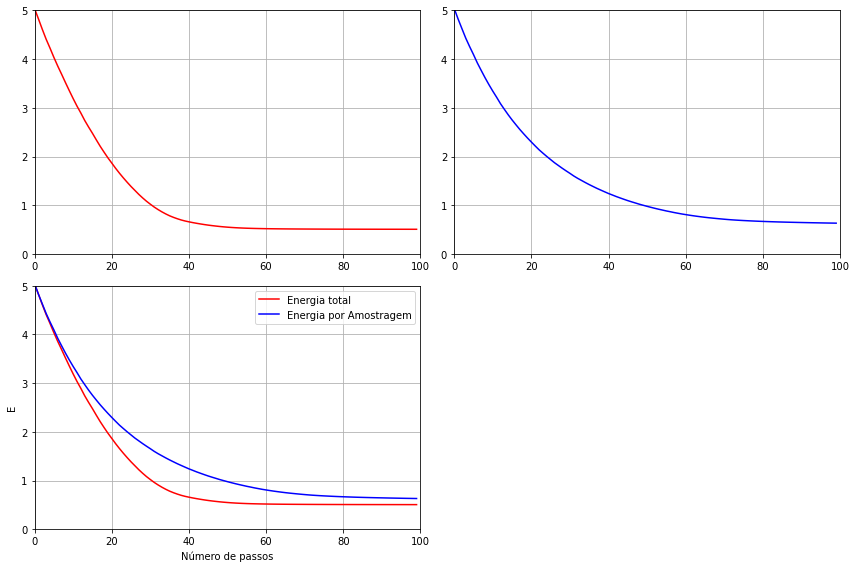

In [26]:
#plot da energia
plt.figure(figsize = (12,8))

plt.subplot(221)
plt.plot(np.arange(len(E)),E, 'r', label = 'Energia total')
plt.xlim(0,100)
plt.ylim(0,5)
plt.grid()

#plot da energia por amostragem por importância
plt.subplot(222)
plt.plot(np.arange(len(Eimportance)), Eimportance, 'b', label = 'Energia por Amostragem')
plt.xlim(0,100)
plt.ylim(0,5)
plt.grid()

#plot das duas energias
plt.subplot(223)
plt.plot(np.arange(len(E)),E, 'r', label = 'Energia total')
plt.plot(np.arange(len(Eimportance)), Eimportance, 'b', label = 'Energia por Amostragem')
plt.xlim(0,100)
plt.ylim(0,5)
plt.xlabel('Número de passos')
plt.ylabel('E')
plt.grid()
plt.tight_layout()
plt.legend()

plt.show()

* Normalização de Gram-Schidt para a função de onda referente a energia do primeiro estado excitado:

$\psi_{1} = \psi_{t} - \frac{<\psi_0|\psi_{t}>}{<\psi_0|\psi_0>} \psi_0$

In [ ]:
# monte carlo variacional
psi1 = normalization(x)

for i in tqdm(range(300)):
    Psi1 = psi1 - (np.vdot(psi0,psi1) / np.vdot(psi0,psi0))*psi0
    Ps11 = montecarlo(Psi1, potencial, x, y, N)
    psi1 = Psi1
    
# amostragem por importância
psi1ip = normalization(x)

for i in tqdm(range(300)):
    Psi1IP = psi1ip - (np.vdot(psi0,psi1ip) / np.vdot(psi0,psi0))*psi0
    Ps11IP = montecarloImportance(Psi1IP, potencial, x, y, N, importance)
    psi1ip = Ps11IP

<Figure size 864x432 with 0 Axes>

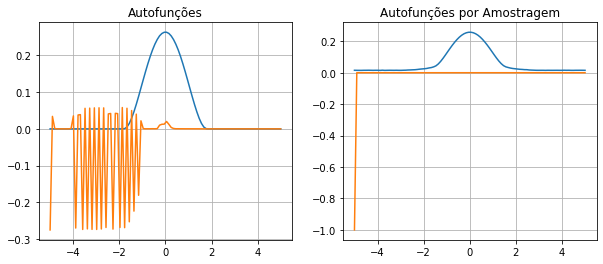

In [135]:
#plot das autofunções
plt.figure(figsize = (12,6))

plt.figure(figsize = (10,4))
plt.subplot(121)
plt.plot(x, normalization(Psi0))
plt.plot(x, normalization(psi1))
plt.grid()
plt.title('Autofunções')


plt.subplot(122)
plt.plot(x, normalization(Psi0AI))
plt.plot(x, normalization(psi1ip))
plt.grid()
plt.title('Autofunções por Amostragem')

plt.show()

## Poço quadrado 

In [136]:
#função teste
psi0pQ = np.ones(len(xp))

EpQ = []

for i in tqdm(range(100)):
    Psi0pQ = montecarlo(psi0pQ, pQuadrado, xp, y, N)
    ef = energia(Psi0pQ, pQuadrado, y, xp, N)
    EpQ.append(ef)

#função teste para amostragem por importância
psi0aipQ = np.ones(len(xp))

EimportancepQ = []

for i in tqdm(range(100)):
    Psi0AIpQ = montecarloImportance(psi0aipQ, pQuadrado, xp, y, N, importance)
    ef = energia(Psi0AIpQ, pQuadrado, y, xp, N)
    EimportancepQ.append(ef)

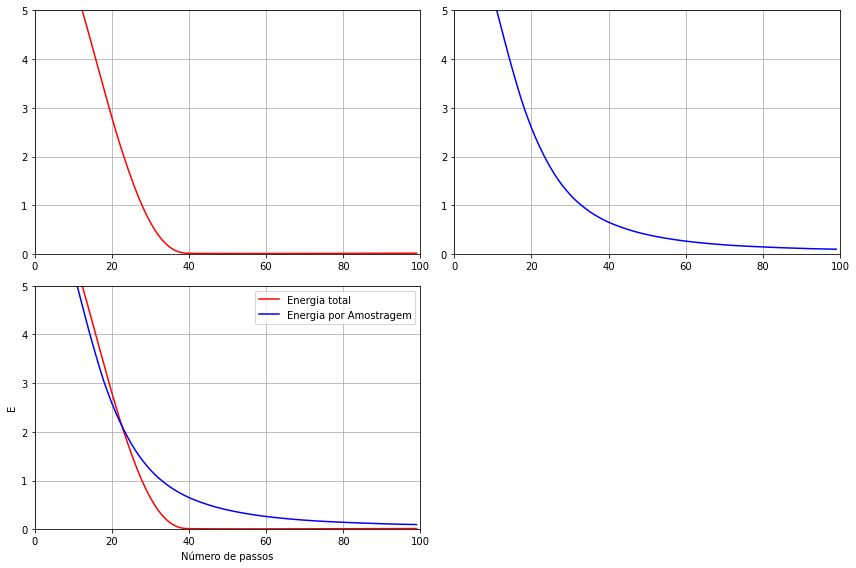

In [137]:
#plot da energia
plt.figure(figsize = (12,8))

plt.subplot(221)
plt.plot(np.arange(len(EpQ)),EpQ, 'r', label = 'Energia total')
plt.xlim(0,100)
plt.ylim(0,5)
plt.grid()

#plot da energia por amostragem por importância
plt.subplot(222)
plt.plot(np.arange(len(EimportancepQ)), EimportancepQ, 'b', label = 'Energia por Amostragem')
plt.xlim(0,100)
plt.ylim(0,5)
plt.grid()

#plot das duas energias
plt.subplot(223)
plt.plot(np.arange(len(EpQ)),EpQ, 'r', label = 'Energia total')
plt.plot(np.arange(len(EimportancepQ)), EimportancepQ, 'b', label = 'Energia por Amostragem')
plt.xlim(0,100)
plt.ylim(0,5)
plt.xlabel('Número de passos')
plt.ylabel('E')
plt.grid()
plt.tight_layout()
plt.legend()

plt.show()

In [138]:
# Monte Carlo variacional por Gram-Schimidt para o primeiro estado excitado
psi1pQ = normalization(-xp)

for i in tqdm(range(300)):
    Psi1pQ = psi1pQ - (np.vdot(Psi0pQ,psi1pQ) / np.vdot(Psi0pQ,Psi0pQ))*Psi0pQ
    Psi1pQ = montecarlo(Psi1pQ, pQuadrado, xp, y, N)
    psi1pQ = Psi1pQ

# Primeiro estado excita do por amostragem por importância
psi1ipQ = normalization(-xp)

for i in tqdm(range(300)):
    Psi1IPpQ = psi1ipQ - (np.vdot(Psi0AIpQ,psi1ipQ) / np.vdot(Psi0AIpQ,Psi0AIpQ))*Psi0AIpQ
    Psi1IPpQ = montecarloImportance(Psi1IPpQ, pQuadrado, xp, y, N, importance)
    psi1ipQ = Psi1IPpQ

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize = (10,4))


plt.subplot(121)
plt.plot(x, normalization(Psi0pQ))
plt.plot(x, normalization(psi1pQ))
plt.grid()
plt.tight_layout()
#plt.legend()
plt.title('Autofunções')


plt.subplot(122)
plt.plot(x, normalization(Psi0AIpQ))
plt.plot(x, normalization(psi1ipQ))
plt.grid()
plt.tight_layout()
#plt.legend()
plt.title('Autofunções por Amostragem')

plt.show()

## Poço Quadrado Duplo

In [ ]:
#função teste
psi0pD = np.ones(len(xp))

EpD = []

for i in tqdm(range(100)):
    Psi0pD = montecarlo(psi0pD, pDouble, xp, y, N)
    ef = energia(Psi0pD, pDouble, y, xp, N)
    EpD.append(ef)

#função teste para amostragem por importância
psi0aipD = np.ones(len(xp))

EimportancepD = []

for i in tqdm(range(100)):
    Psi0AIpD = montecarloImportance(psi0aipD, pDouble, xp, y, N, importance)
    ef = energia(Psi0AIpD, pDouble, y, xp, N)
    EimportancepD.append(ef)

In [ ]:
#plot da energia
plt.figure(figsize = (12,8))

plt.subplot(221)
plt.plot(np.arange(len(EpD)),EpD, 'r', label = 'Energia total')
plt.xlim(0,100)
plt.ylim(0,5)
plt.grid()

#plot da energia por amostragem por importância
plt.subplot(222)
plt.plot(np.arange(len(EimportancepD)), EimportancepD, 'b', label = 'Energia por Amostragem')
plt.xlim(0,100)
plt.ylim(0,5)
plt.grid()

#plot das duas energias
plt.subplot(223)
plt.plot(np.arange(len(EpD)),EpD, 'r', label = 'Energia total')
plt.plot(np.arange(len(EimportancepD)), EimportancepD, 'b', label = 'Energia por Amostragem')
plt.xlim(0,100)
plt.ylim(0,5)
plt.xlabel('Número de passos')
plt.ylabel('E')
plt.grid()
plt.tight_layout()
plt.legend()

plt.show()

In [ ]:
# monte carlo variacional
psi1pD = normalization(-xp)

for i in tqdm(range(500)):
    Psi1pD = psi1pD - (np.vdot(psi0pD,psi1pD) / np.vdot(psi0pD,psi0pD))*psi0pD
    Psi1pD = montecarlo(Psi1pD, pDouble, xp, y, N)
    psi1pD = Psi1pD
    
# amostragem por importância
psi1ipD = normalization(-xp)

for i in tqdm(range(500)):
    Psi1IPpD = psi1ipD - (np.vdot(psi0aipD,psi1ipD) / np.vdot(psi0aipD,psi0aipD))*psi0aipD
    Psi1IPpD = montecarloImportance(Psi1IPpD, pDouble, xp, y, N, importance)
    psi1ipD = Psi1IPpD

In [ ]:
#plot das autofunções
plt.figure(figsize = (12,6))

plt.figure(figsize = (10,4))
plt.subplot(121)
plt.plot(x, normalization(psi0pD))
plt.plot(x, normalization(psi1pD))
plt.grid()
plt.title('Autofunções')


plt.subplot(122)
plt.plot(x, normalization(psi0aipD))
plt.plot(x, normalization(psi1ipD))
plt.grid()
plt.title('Autofunções por Amostragem')

plt.show()